# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("/workspaces/app_fk/data/student_admission_record_dirty.csv")
total_data.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [3]:
total_data.shape

(157, 7)

In [4]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(151, 7)


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [5]:
total_data.isnull().sum().sort_values(ascending=False)

Admission Test Score      11
High School Percentage    11
Name                      10
Gender                    10
Age                       10
City                      10
Admission Status          10
dtype: int64

In [6]:

total_data["Admission Test Score"] = total_data["Admission Test Score"].fillna(total_data["Admission Test Score"].median())
total_data["High School Percentage"] = total_data["High School Percentage"].fillna(total_data["High School Percentage"].mode()[0])
total_data["Gender"] = total_data["Gender"].fillna(total_data["Gender"].mode()[0]) 
total_data["Age"] = total_data["Age"].fillna(total_data["Age"].mode()[0])
total_data["City"] = total_data["City"].fillna(total_data["City"].mode()[0]) 
total_data["Admission Status"] = total_data["Admission Status"].fillna(total_data["Admission Status"].mode()[0])  


total_data["Name"].fillna("Desconocido", inplace=True)  


total_data.isnull().sum()


/tmp/ipykernel_31919/2001177043.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data["Name"].fillna("Desconocido", inplace=True)


Name                      0
Age                       0
Gender                    0
Admission Test Score      0
High School Percentage    0
City                      0
Admission Status          0
dtype: int64

In [7]:
total_data.drop(["Name", "City"], axis = 1, inplace = True)
total_data.head()

,Age,Gender,Admission Test Score,High School Percentage,Admission Status
0,24.0,Female,50.0,68.90,Rejected
1,21.0,Female,99.0,60.73,Rejected
2,17.0,Male,89.0,54.59,Accepted
3,17.0,Male,55.0,85.29,Rejected
4,20.0,Male,65.0,61.13,Rejected


In [8]:
#total_data["Gender"] = total_data["Gender"].str.strip()  # Eliminar espacios
#total_data["Admission Status"] = total_data["Admission Status"].str.strip()  # Eliminar espacios
#total_data["Gender"] = total_data["Gender"].str.replace(',', '.')  # Reemplazar coma por punto
#total_data["Admission Status"] = total_data["Admission Status"].str.replace(',', '.')  # Reemplazar coma por punto
#total_data["Gender"] = total_data["Gender"].str.replace('$', '')  # Eliminar símbolo de dólar
#total_data["Admission Status"] = total_data["Admission Status"].str.replace('$', '')  # Eliminar símbolo de dólar
# Convertir a numérico
#total_data["Gender"] = pd.to_numeric(total_data["Gender"], errors='coerce')
#total_data["Admission Status"] = pd.to_numeric(total_data["Gender"], errors='coerce')
# Manejar valores NaN
#total_data["Gender"].fillna(0, inplace=True)  # Rellenar NaN con 0
#total_data["Admission Status"].fillna(0, inplace=True)  # Rellenar NaN con 0
# Mostrar el DataFrame resultante
#print("DataFrame después de la conversión:")
#total_data.head()


In [9]:
print(total_data['Gender'].unique())
print(total_data['Admission Status'].unique())

['Female' 'Male']
['Rejected' 'Accepted']


In [10]:
total_data['Gender'] = total_data['Gender'].astype(str).str.strip().str.lower()
total_data['Admission Status'] = total_data['Admission Status'].astype(str).str.strip().str.lower()
print(total_data['Gender'].unique())
print(total_data['Admission Status'].unique())

['female' 'male']
['rejected' 'accepted']


In [11]:
total_data['Gender'] = total_data['Gender'].map({
    'male': True,
    'female': False
})

total_data['Admission Status'] = total_data['Admission Status'].map({
    'admitted': True,
    'rejected': False
})

In [12]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
# Ver todos los registros de la columna 'Nombre'
print("Todos los registros de la columna 'Nombre':")
print(total_data['Admission Status'])


Todos los registros de la columna 'Nombre':
0      False
1      False
2        NaN
3      False
4      False
5        NaN
6        NaN
7        NaN
8        NaN
9      False
10     False
11       NaN
12     False
13       NaN
14     False
15     False
16     False
17     False
18       NaN
19     False
20     False
21     False
23     False
24     False
25     False
26     False
27     False
28       NaN
29       NaN
30     False
31     False
32     False
33     False
34     False
35       NaN
36     False
37     False
38     False
39       NaN
40     False
41     False
42       NaN
43       NaN
44       NaN
45     False
46       NaN
47       NaN
48       NaN
49     False
50     False
51     False
53     False
54     False
55       NaN
56       NaN
57       NaN
58       NaN
59     False
60       NaN
61       NaN
62       NaN
63       NaN
64     False
65     False
66     False
67     False
68     False
69       NaN
70       NaN
71     False
72     False
73       NaN
74     False
75     

In [13]:
print(total_data['Gender'].unique())
print(total_data['Admission Status'].unique())

[False  True]
[False nan]


In [17]:
total_data['Admission Status'] = total_data['Admission Status'].fillna(True)

/tmp/ipykernel_31919/1644196348.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_data['Admission Status'] = total_data['Admission Status'].fillna(True)


In [19]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
# Ver todos los registros de la columna 'Nombre'
print("Todos los registros de la columna 'Nombre':")
print(total_data['Gender'])

Todos los registros de la columna 'Nombre':
0      False
1      False
2       True
3      False
4      False
5       True
6       True
7       True
8       True
9      False
10     False
11      True
12     False
13      True
14     False
15     False
16     False
17     False
18      True
19     False
20     False
21     False
23     False
24     False
25     False
26     False
27     False
28      True
29      True
30     False
31     False
32     False
33     False
34     False
35      True
36     False
37     False
38     False
39      True
40     False
41     False
42      True
43      True
44      True
45     False
46      True
47      True
48      True
49     False
50     False
51     False
53     False
54     False
55      True
56      True
57      True
58      True
59     False
60      True
61      True
62      True
63      True
64     False
65     False
66     False
67     False
68     False
69      True
70      True
71     False
72     False
73      True
74     False
75     

In [20]:
total_data.head()

,Age,Gender,Admission Test Score,High School Percentage,Admission Status
0,24.0,False,50.0,68.90,False
1,21.0,False,99.0,60.73,False
2,17.0,True,89.0,54.59,True
3,17.0,False,55.0,85.29,False
4,20.0,False,65.0,61.13,False


In [22]:
from sklearn.model_selection import train_test_split

num_variables = ["Age", "Gender", "Admission Test Score", "High School Percentage"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Admission Status", axis = 1)[num_variables]
y = total_data["Admission Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Age,Gender,Admission Test Score,High School Percentage
15,19.0,False,84.0,97.19
131,17.0,False,78.0,82.49
11,18.0,True,89.0,54.59
133,20.0,False,71.0,80.91
53,23.0,False,98.0,76.97


In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_pred = model.predict(X_test)

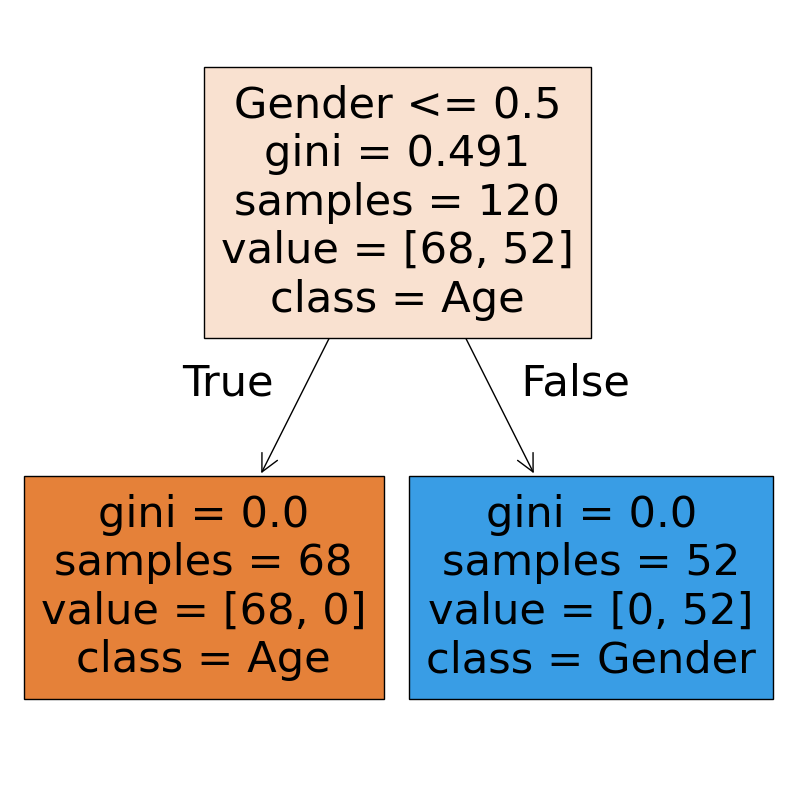

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,10))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["Age", "Gender", "Admission Test Score", "High School Percentage"], filled = True)

plt.show()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [29]:
### Profundidad del árbol
model.get_depth()

1

In [30]:
### Número de hojas
model.get_n_leaves()

np.int64(2)

In [31]:
from pickle import dump

dump(model, open("../models/decision_tree_classifier_default_42.sav", "wb"))